# Least-Squares Approximation

We create a globally defined fit function using 9 points and two sets of known values.

In [1]:
import numpy as np

# the coordinates of the known values
points = [(1, 1), (1, -1), (-1, 1), (-1, -1), (0, 0), (1, 0), (-1, 0), (0, 1), (0, -1)]

# two sets of known values
values = [[1, -0.5, 1, 1, -1, 0, 0, 0, 0], [1, -1, 0, 0, 1, 0, -1, -1, 1]]

# transpose the values because the function expects datasets to be columns
values = np.array(values).T

We wish to fit a quadratic (2nd order) polynomial for a set of points in a 2 dimensional space (each point has 2 coordinates).

In [2]:
from sigmaepsilon.math.approx import least_squares

approx = least_squares(points, values, deg=2, order=1)

f, fdx, fdy, fdxx, fdyy, fdxy = approx([0, 0])
approx([0, 0])

(array([-0.83333333,  0.33333333]),
 array([-0.25      ,  0.16666667]),
 array([0.25, 0.  ]),
 None,
 None,
 None)

The cell below plots the fit function using `Matplotlib`.

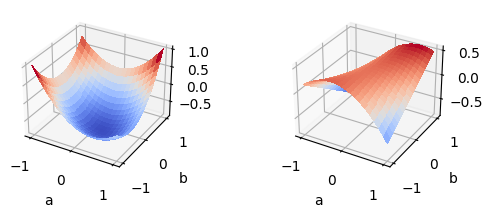

In [3]:
from matplotlib import pyplot as plt
from matplotlib import cm

n = 20  # number of sampling points per coordinate
X = np.linspace(-1, 1, n)
Y = np.linspace(-1, 1, n)
X, Y = np.meshgrid(X, Y)
Z = np.zeros([values.shape[-1], n, n])

for i in range(n):
    for j in range(n):
        f, *_ = approx([X[i, j], Y[i, j]])
        Z[:, i, j] = f

fig = plt.figure()
ax1 = fig.add_subplot(221, projection="3d")
ax2 = fig.add_subplot(222, projection="3d")

ax1.plot_surface(X, Y, Z[0, ::], cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax2.plot_surface(X, Y, Z[1, ::], cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax1.set_xlabel("a")
ax1.set_ylabel("b")
ax2.set_xlabel("a")
ax2.set_ylabel("b")
plt.show()